# Import Data #

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pada analisa ini akan menggunakan `dataset_2` yang merupakan hasil modeling pada `dataset_1`, berisi kolom-kolom yang sama dengan output `dataset_1` hanya saja ditambahkan 1 kolom baru yaitu `avg_body_weight` yang didapatkan dari penggabungan `dataset_1` dengan `samplings.csv`, kemudian dilakukan perhitungan rata-rata(average) pada kolom average_weight.

In [75]:
df = pd.read_csv('dataset_2.csv')
samplings = pd.read_csv('samplings.csv')
samplings.head()

,cycle_id,updated_at,sampled_at,created_at,average_weight,id,remark
0,18747.0,2022-10-07 03:26:30,2022-09-24,2022-10-07 02:10:49,4.91,32508.0,Size 204\nP/H = 99 kg\nP/K = 2.020 kg\nSamplin...
1,18747.0,2022-10-07 03:27:27,2022-10-01,2022-10-07 03:27:27,7.12,32534.0,"Size 140\nADG = 0,31\nP/H = 139 kg\nP/K = 2.88..."
2,18747.0,2022-10-08 01:30:56,2022-10-08,2022-10-08 01:30:56,9.75,32575.0,"Size 103\nADG = 0,38\nP/H = 160 kg\nP/K = 3.94..."
3,18747.0,2022-10-15 03:24:26,2022-10-15,2022-10-15 03:24:26,11.15,32864.0,"Size 90\nADG 0,23\nP/H = 180 kg\nP/K = 5.149 k..."
4,27095.0,2023-11-05 09:03:39,2023-10-07,2023-11-05 09:03:39,4.79,52037.0,NaN


In [76]:
sampling = samplings[['cycle_id','average_weight']]
sampling['cycle_id'] = sampling['cycle_id'].astype(int)
sampling['avg_body_weight'] = sampling['average_weight']
sampling = sampling[['cycle_id','avg_body_weight']]
sampling.head()

,cycle_id,avg_body_weight
0,18747,4.91
1,18747,7.12
2,18747,9.75
3,18747,11.15
4,27095,4.79


In [77]:
sampling_grouped = sampling.groupby('cycle_id').mean().reset_index()
sampling_grouped.head()

,cycle_id,avg_body_weight
0,3458,13.590000
1,3459,14.322308
2,4038,10.585366
3,4039,10.881250
4,4044,12.280714


In [78]:
df = df.merge(sampling_grouped, on='cycle_id')
df['survival_rate_pred'] = round(df['survival_rate_pred'],2)
df['avg_body_weight'] = round(df['avg_body_weight'],2)
df.head()

,cycle_id,pond_id,species_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_size,...,total_seed_type_net,pond_name_A,pond_name_A1,pond_name_A2,pond_name_A3,pond_name_A4,pond_name_Other,survival_rate,survival_rate_pred,avg_body_weight
0,3458,12969,1,566669,4968.0,0,1.25,120,45.0,4811.01,...,1,0,0,0,0,0,1,78.45,77.67,13.59
1,3459,12996,1,566669,4968.0,0,1.25,121,45.0,4636.22,...,1,0,0,0,0,0,1,77.72,77.55,14.32
2,4044,14348,1,215858,1250.0,0,1.25,120,45.0,1249.91,...,1,0,0,1,0,0,0,86.86,88.47,12.28
3,4045,14349,1,227526,1310.0,0,1.25,120,45.0,1309.70,...,1,0,0,0,1,0,0,88.21,88.64,11.85
4,4046,14350,1,180854,1040.0,0,1.25,120,45.0,1040.11,...,1,0,0,0,0,1,0,88.19,88.86,12.12


# EDA #

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                1855 non-null   int64  
 1   pond_id                 1855 non-null   int64  
 2   species_id              1855 non-null   int64  
 3   total_seed              1855 non-null   int64  
 4   area                    1855 non-null   float64
 5   initial_age             1855 non-null   int64  
 6   limit_weight_per_area   1855 non-null   float64
 7   target_cultivation_day  1855 non-null   int64  
 8   target_size             1855 non-null   float64
 9   pond_size               1855 non-null   float64
 10  padat_tebar             1855 non-null   float64
 11  total_feed              1855 non-null   float64
 12  avg_feed_per_day        1855 non-null   float64
 13  avg_growth_feed         1855 non-null   float64
 14  size_harvest            1855 non-null   

## Define Target ##

kolom yang akan digunakan sebagai target adalah `avg_body_weight`

In [80]:
df[['total_seed', 'total_harvested', 'survival_rate_pred', 'avg_body_weight']].head()

,total_seed,total_harvested,survival_rate_pred,avg_body_weight
0,566669,444548,77.67,13.59
1,566669,440388,77.55,14.32
2,215858,187493,88.47,12.28
3,227526,200709,88.64,11.85
4,180854,159488,88.86,12.12


## Statistical Descriptive ##

In [81]:
df.describe()

,cycle_id,pond_id,species_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_size,...,total_seed_type_net,pond_name_A,pond_name_A1,pond_name_A2,pond_name_A3,pond_name_A4,pond_name_Other,survival_rate,survival_rate_pred,avg_body_weight
count,1855.000000,1855.000000,1855.0,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,...,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000
mean,19955.811860,32740.555795,1.0,198598.604313,1501.944604,0.156334,1.335995,112.935849,50.809164,1518.948916,...,0.541779,0.023181,0.121833,0.059299,0.025337,0.019946,0.750404,66.619903,66.654825,8.541461
std,5879.634556,9890.453279,0.0,138672.506998,1204.525344,0.787121,0.407447,14.259942,8.384903,943.410126,...,0.498386,0.150517,0.327181,0.236248,0.157189,0.139853,0.432896,28.647294,27.861229,4.576116
min,3458.000000,6738.000000,1.0,10.000000,1.020000,0.000000,0.600000,55.000000,20.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.030000,0.020000
25%,16154.500000,25603.500000,1.0,85000.000000,800.000000,0.000000,1.250000,100.000000,45.000000,810.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,45.425000,45.875000,5.475000
50%,19780.000000,34491.000000,1.0,170478.000000,1250.000000,0.000000,1.250000,120.000000,55.000000,1350.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,71.170000,71.960000,7.690000
75%,24894.500000,39677.500000,1.0,293670.000000,2025.000000,0.000000,1.250000,120.000000,55.000000,2129.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,93.245000,92.280000,10.875000
max,29874.000000,47282.000000,1.0,702720.000000,30000.000000,12.000000,4.770000,160.000000,90.000000,6880.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,99.990000,100.000000


## Univariate Analysis ##

**Numerical Columns**

In [82]:
nums = df.select_dtypes(exclude='object')
nums = nums.columns

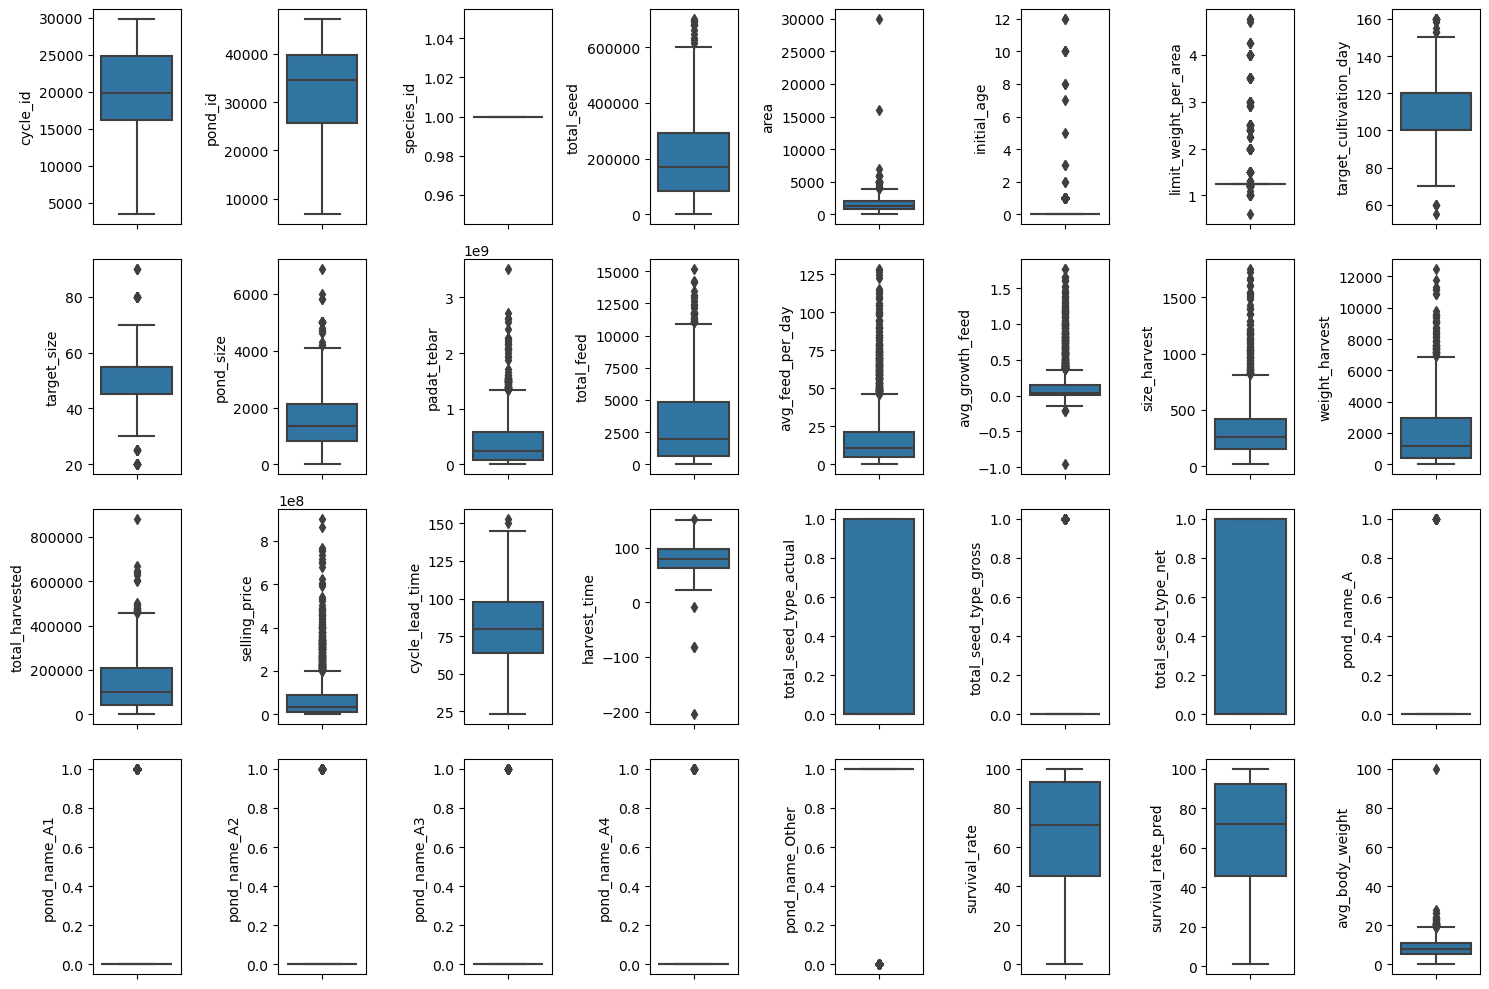

In [83]:
plt.figure(figsize=(15,10))
for i  in range(0, len(nums)):
    plt.subplot(4,8,i+1)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()

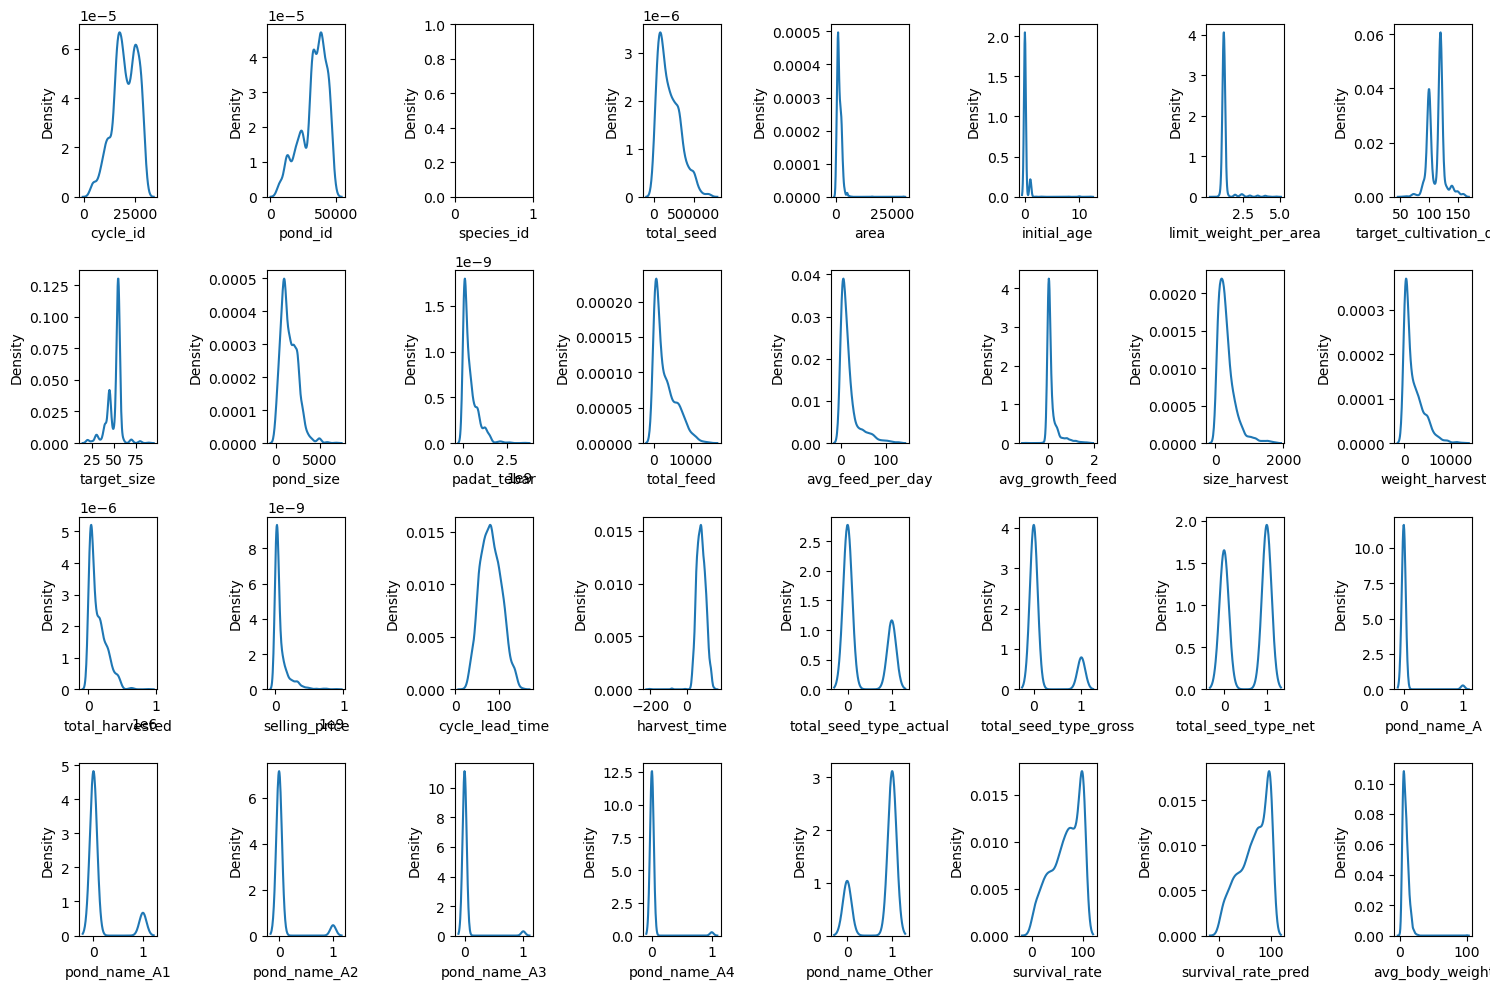

In [84]:
plt.figure(figsize=(15,10))
for i  in range(0, len(nums)):
    plt.subplot(4,8,i+1)
    sns.kdeplot(x=df[nums[i]])
    plt.tight_layout()

**Categorical Columns**

In [85]:
cats = df.select_dtypes(include='object')
cats

""
0
1
2
3
4
...
1850
1851
1852
1853


## Multivariate Analysis ##

<Axes: >

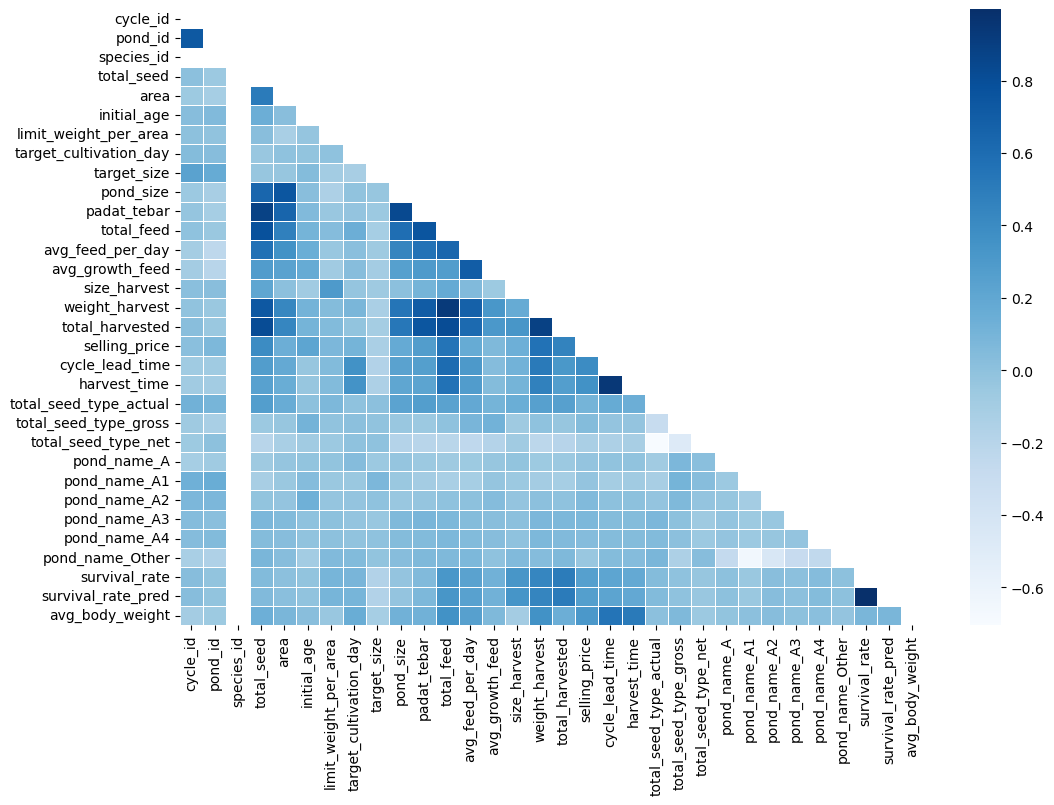

In [86]:
corr = df[nums].corr()
fig, axes = plt.subplots(figsize=(12, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, linewidths=.5, cmap='Blues', annot=True, fmt='.2f')
# plt.show()

## Insights ##

pada kolom-kolom numerical hampir semua data terdistribusi dengan baik, tidak ada data yang persebarannya sangat random kecuali pada kolom id (cycle_id, pond_id, species_id)

# Data Preprocessing #

## Data Cleaning ##

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                1855 non-null   int64  
 1   pond_id                 1855 non-null   int64  
 2   species_id              1855 non-null   int64  
 3   total_seed              1855 non-null   int64  
 4   area                    1855 non-null   float64
 5   initial_age             1855 non-null   int64  
 6   limit_weight_per_area   1855 non-null   float64
 7   target_cultivation_day  1855 non-null   int64  
 8   target_size             1855 non-null   float64
 9   pond_size               1855 non-null   float64
 10  padat_tebar             1855 non-null   float64
 11  total_feed              1855 non-null   float64
 12  avg_feed_per_day        1855 non-null   float64
 13  avg_growth_feed         1855 non-null   float64
 14  size_harvest            1855 non-null   

### 1. Handle Missing Value ###

In [88]:
df.nunique()

cycle_id                  1855
pond_id                   1356
species_id                   1
total_seed                 687
area                       512
initial_age                  9
limit_weight_per_area       19
target_cultivation_day      56
target_size                 17
pond_size                  518
padat_tebar               1204
total_feed                1798
avg_feed_per_day          1423
avg_growth_feed            145
size_harvest              1111
weight_harvest            1587
total_harvested           1766
selling_price             1419
cycle_lead_time            117
harvest_time               119
total_seed_type_actual       2
total_seed_type_gross        2
total_seed_type_net          2
pond_name_A                  2
pond_name_A1                 2
pond_name_A2                 2
pond_name_A3                 2
pond_name_A4                 2
pond_name_Other              2
survival_rate             1343
survival_rate_pred        1564
avg_body_weight            968
dtype: i

In [89]:
df.isna().sum()

cycle_id                  0
pond_id                   0
species_id                0
total_seed                0
area                      0
initial_age               0
limit_weight_per_area     0
target_cultivation_day    0
target_size               0
pond_size                 0
padat_tebar               0
total_feed                0
avg_feed_per_day          0
avg_growth_feed           0
size_harvest              0
weight_harvest            0
total_harvested           0
selling_price             0
cycle_lead_time           0
harvest_time              0
total_seed_type_actual    0
total_seed_type_gross     0
total_seed_type_net       0
pond_name_A               0
pond_name_A1              0
pond_name_A2              0
pond_name_A3              0
pond_name_A4              0
pond_name_Other           0
survival_rate             0
survival_rate_pred        0
avg_body_weight           0
dtype: int64

karena dataset merupakan hasil dari modeling sebelumnya, maka tidak ditemukan adanya nilai null pada setiap kolom.

### 2. Handle Duplicated Data ###

In [90]:
df.duplicated(subset=['cycle_id']).sum()

0

tidak ada data duplikat.

### 3. Handle Outliers ###

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                1855 non-null   int64  
 1   pond_id                 1855 non-null   int64  
 2   species_id              1855 non-null   int64  
 3   total_seed              1855 non-null   int64  
 4   area                    1855 non-null   float64
 5   initial_age             1855 non-null   int64  
 6   limit_weight_per_area   1855 non-null   float64
 7   target_cultivation_day  1855 non-null   int64  
 8   target_size             1855 non-null   float64
 9   pond_size               1855 non-null   float64
 10  padat_tebar             1855 non-null   float64
 11  total_feed              1855 non-null   float64
 12  avg_feed_per_day        1855 non-null   float64
 13  avg_growth_feed         1855 non-null   float64
 14  size_harvest            1855 non-null   

In [95]:
from scipy import stats
dfz = df.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(dfz)}')

filtered_entries = np.array([True] * len(dfz))

for col in nums:
    zscore = abs(stats.zscore(dfz[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
dfz = dfz[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(dfz)}')

Jumlah baris sebelum memfilter outlier: 1855
Jumlah baris setelah memfilter outlier: 0


In [96]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                0 non-null      int64  
 1   pond_id                 0 non-null      int64  
 2   species_id              0 non-null      int64  
 3   total_seed              0 non-null      int64  
 4   area                    0 non-null      float64
 5   initial_age             0 non-null      int64  
 6   limit_weight_per_area   0 non-null      float64
 7   target_cultivation_day  0 non-null      int64  
 8   target_size             0 non-null      float64
 9   pond_size               0 non-null      float64
 10  padat_tebar             0 non-null      float64
 11  total_feed              0 non-null      float64
 12  avg_feed_per_day        0 non-null      float64
 13  avg_growth_feed         0 non-null      float64
 14  size_harvest            0 non-null      float64
 15  weight

karena dataset yang digunakan merupakan dataset hasil modeling sebelumnya, maka tidak diperlukan proses membuang outlier.

## Feature Transformation ##

Standardization

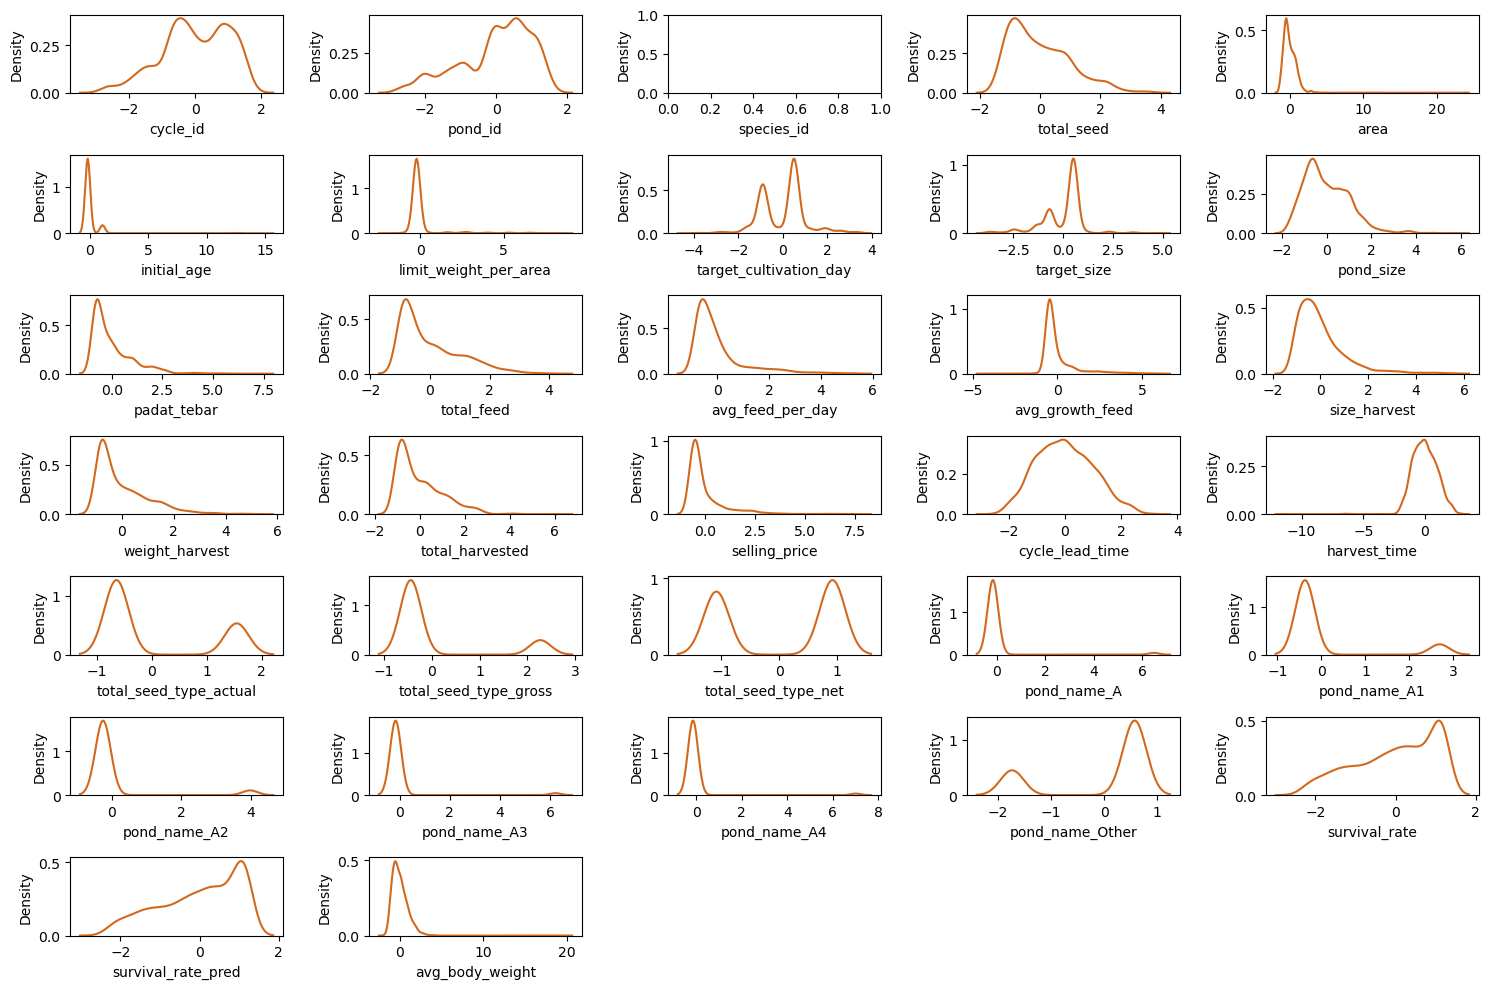

In [97]:
from sklearn.preprocessing import StandardScaler

df_std = df.copy()

col = df_std.columns
plt.figure(figsize=(15,10))
for i in range(0, len(col)):
    plt.subplot(7, 5, i+1)
    nama = col[i]
    df_std[nama] = StandardScaler().fit_transform(df_std[col[i]].values.reshape(len(df_std),1))
    sns.kdeplot(df_std[nama], color='chocolate')
    plt.tight_layout()

## Feature Selection ##

In [98]:
df_std.head()

,cycle_id,pond_id,species_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_size,...,total_seed_type_net,pond_name_A,pond_name_A1,pond_name_A2,pond_name_A3,pond_name_A4,pond_name_Other,survival_rate,survival_rate_pred,avg_body_weight
0,-2.806681,-1.999594,0.0,2.654958,2.878304,-0.198669,-0.211114,0.495518,-0.692999,3.490474,...,0.919658,-0.154048,-0.372472,-0.251072,-0.161231,-0.142661,0.576728,0.413068,0.395465,1.103534
1,-2.806511,-1.996863,0.0,2.654958,2.878304,-0.198669,-0.211114,0.565663,-0.692999,3.305150,...,0.919658,-0.154048,-0.372472,-0.251072,-0.161231,-0.142661,0.576728,0.387579,0.391157,1.263101
2,-2.706988,-1.860129,0.0,0.124495,-0.209221,-0.198669,-0.211114,0.495518,-0.692999,-0.285254,...,0.919658,-0.154048,-0.372472,3.982918,-0.161231,-0.142661,-1.733920,0.706718,0.783205,0.817188
3,-2.706818,-1.860028,0.0,0.208658,-0.159396,-0.198669,-0.211114,0.495518,-0.692999,-0.221860,...,0.919658,-0.154048,-0.372472,-0.251072,6.202265,-0.142661,-1.733920,0.753855,0.789308,0.723197
4,-2.706648,-1.859926,0.0,-0.127995,-0.383611,-0.198669,-0.211114,0.495518,-0.692999,-0.507699,...,0.919658,-0.154048,-0.372472,-0.251072,-0.161231,7.009646,-1.733920,0.753157,0.797207,0.782214


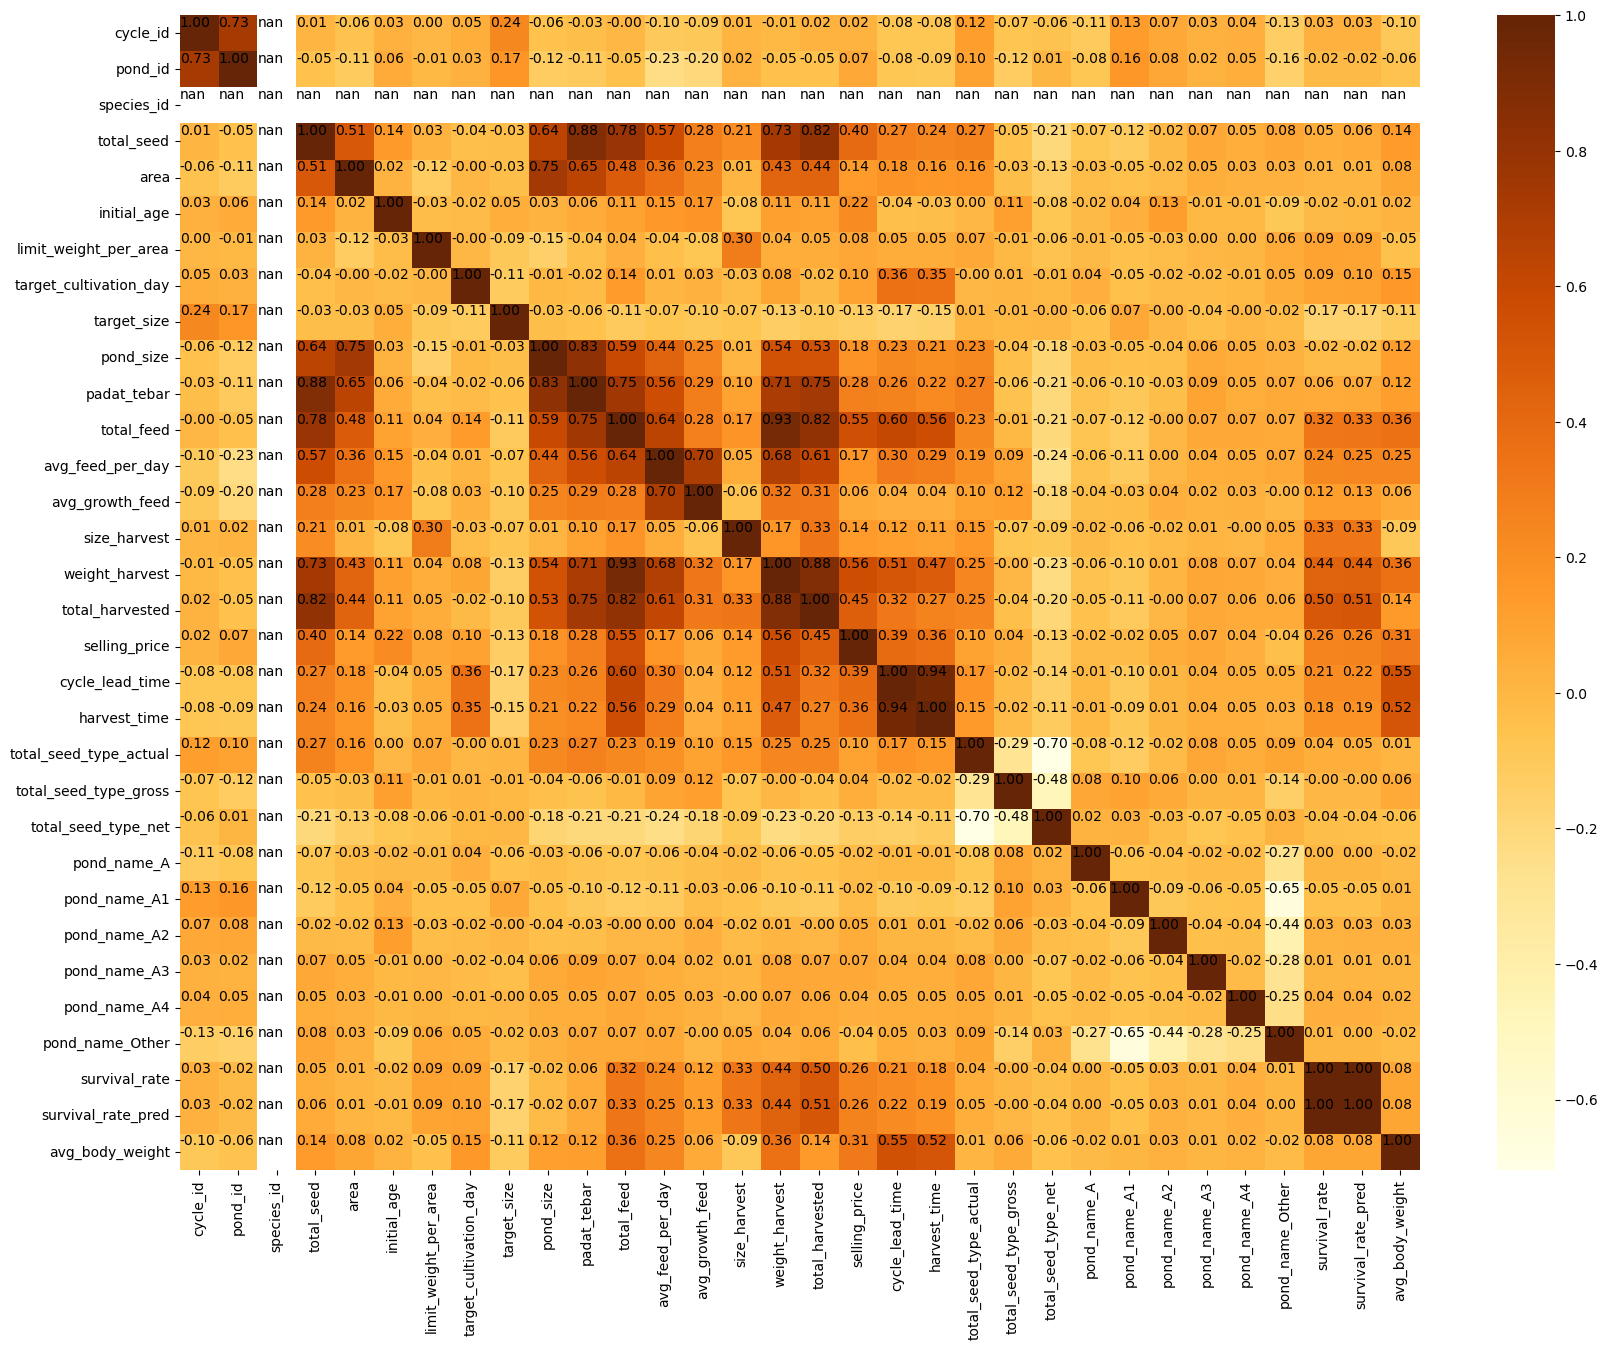

In [99]:
corr = df_std.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, cmap='YlOrBr')
for i in range(len(corr.columns)):
  for j in range(len(corr.columns)):
    plt.text(i, j, f"{corr.iloc[i, j]:.2f}", ha='left', va='top')
# ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

berdasarkan nilai korelasi pada heatmap, kami memutuskan untuk membuang kolom yang memiliki korelasi dibawah 0.1 dengan kolom target. sehingga terdapat 14 kolom yang akan kami gunakan pada tahap selanjutnya.

In [100]:
df_final = df_std[['cycle_id', 'total_seed', 'target_cultivation_day', 'target_size', 'pond_size', 'padat_tebar', 
                'total_feed', 'avg_feed_per_day', 'weight_harvest', 'total_harvested', 'selling_price', 
                'cycle_lead_time', 'harvest_time', 'avg_body_weight']]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                1855 non-null   float64
 1   total_seed              1855 non-null   float64
 2   target_cultivation_day  1855 non-null   float64
 3   target_size             1855 non-null   float64
 4   pond_size               1855 non-null   float64
 5   padat_tebar             1855 non-null   float64
 6   total_feed              1855 non-null   float64
 7   avg_feed_per_day        1855 non-null   float64
 8   weight_harvest          1855 non-null   float64
 9   total_harvested         1855 non-null   float64
 10  selling_price           1855 non-null   float64
 11  cycle_lead_time         1855 non-null   float64
 12  harvest_time            1855 non-null   float64
 13  avg_body_weight         1855 non-null   float64
dtypes: float64(14)
memory usage: 203.0 KB


# Data Modeling #

### Split data Train - Test ###

In [101]:
X = df_final.drop('avg_body_weight',axis=1)
y = df_final['avg_body_weight'].values
print(X.shape)
print(y.shape)

(1855, 13)
(1855,)


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Basic Modeling ###

In [104]:
lr_sm = LinearRegression()
dt_sm = DecisionTreeRegressor()
rf_sm = RandomForestRegressor()
gb_sm = GradientBoostingRegressor()

In [105]:
from sklearn.model_selection import cross_validate

def eval_classification(model):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    mae = mean_absolute_error(y_test, y_pred)
    mae1 = mean_absolute_error(y_train, y_pred_train)
    mse = mean_squared_error(y_test, y_pred)
    mse1 = mean_squared_error(y_train, y_pred_train)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse1 = mean_squared_error(y_train, y_pred_train, squared=False)
    r2 = r2_score(y_test, y_pred)
    r21 = r2_score(y_train, y_pred_train)
    
    results = {'MAE (Test Set)': mae,
               'MAE (Train Set)': mae1,
               'MSE (Test Set)': mse,
               'MSE (Train Set)': mse1,
               'RMSE (Test Set)': rmse,
               'RMSE (Train Set)': rmse1,
               'R2-Score (Test Set)': r2,
               'R2-Score (Train Set)': r21
               }
    return results

In [106]:
model_list = [lr_sm, dt_sm, rf_sm, gb_sm]
results_list = []
for model in model_list:
    results = eval_classification(model)
    results_list.append(results)

In [107]:
df_results = pd.DataFrame(results_list, index=['Linear Regression',
                                               'Decision Tree',
                                               'Random Forest',
                                               'Gradient Boosting'])

df_results

,MAE (Test Set),MAE (Train Set),MSE (Test Set),MSE (Train Set),RMSE (Test Set),RMSE (Train Set),R2-Score (Test Set),R2-Score (Train Set)
Linear Regression,0.495675,0.468285,0.461565,0.648311,0.679386,0.805178,0.465418,0.373090
Decision Tree,0.514464,0.000000,0.624008,0.000000,0.789941,0.000000,0.277277,1.000000
Random Forest,0.396419,0.134780,0.351635,0.062970,0.592989,0.250938,0.592737,0.939109
Gradient Boosting,0.426095,0.302981,0.369643,0.175357,0.607983,0.418757,0.571881,0.830432


dari hasil modeling diatas, algoritma **Random Forest** menunjukkan nilai/scoring yang bagus pada masing-masing metrics, sehingga algoritma tersebut yang akan digunakan untuk melanjutkan proses forecasting.

### Hyperparameter Tuning ###

In [108]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=rf_sm, param_distributions=params, cv=5, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

print(f"Best parameters: {random_search.best_params_}")

best_rf_sm = random_search.best_estimator_
y_pred_best_rf = best_rf_sm.predict(X_test)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Mean Squared Error (Best): {mse_best_rf}")
print(f"Mean Absolute Error (Best): {mae_best_rf}")
print(f"R-squared (Best): {r2_best_rf}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Mean Squared Error (Best): 0.3601575898143847
Mean Absolute Error (Best): 0.41823336175094417
R-squared (Best): 0.5828669032204478


### Feature Importance ###

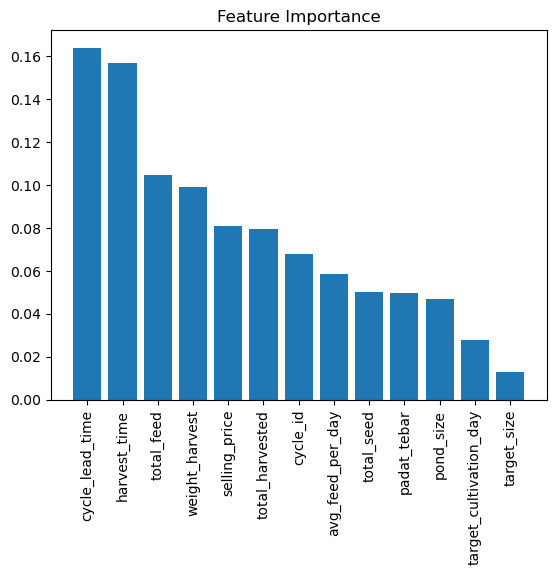

In [109]:
importances = best_rf_sm.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

# Deployment #

In [110]:
import joblib

joblib.dump(best_rf_sm, 'best_rf_model_2.pkl')

['best_rf_model_2.pkl']

In [111]:
loaded_model = joblib.load('best_rf_model_2.pkl')
y_pred_loaded = loaded_model.predict(X_test)

In [116]:
df_new = df.copy()
X_new = df_new.drop('avg_body_weight',axis=1)
y_new = df_new['avg_body_weight'].values

In [117]:
loaded_model.fit(X_new, y_new)
y_pred = loaded_model.predict(X_new)

In [118]:
df_neww = X_new
df_neww['avg_body_weight'] = df_new['avg_body_weight']
df_neww['avg_body_weight_pred'] = y_pred

In [119]:
df_neww

,cycle_id,pond_id,species_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_size,...,pond_name_A,pond_name_A1,pond_name_A2,pond_name_A3,pond_name_A4,pond_name_Other,survival_rate,survival_rate_pred,avg_body_weight,avg_body_weight_pred
0,3458,12969,1,566669,4968.0,0,1.25,120,45.0,4811.01,...,0,0,0,0,0,1,78.45,77.67,13.59,13.013491
1,3459,12996,1,566669,4968.0,0,1.25,121,45.0,4636.22,...,0,0,0,0,0,1,77.72,77.55,14.32,13.356010
2,4044,14348,1,215858,1250.0,0,1.25,120,45.0,1249.91,...,0,0,1,0,0,0,86.86,88.47,12.28,12.328661
3,4045,14349,1,227526,1310.0,0,1.25,120,45.0,1309.70,...,0,0,0,1,0,0,88.21,88.64,11.85,12.095262
4,4046,14350,1,180854,1040.0,0,1.25,120,45.0,1040.11,...,0,0,0,0,1,0,88.19,88.86,12.12,12.803391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,29597,45690,1,400000,2800.0,0,1.25,100,25.0,2800.00,...,0,0,0,0,0,1,46.88,45.73,6.66,6.171066
1851,29619,12688,1,70000,216.0,0,1.25,100,25.0,216.00,...,0,0,0,0,0,1,100.00,99.53,5.64,6.002529
1852,29659,45493,1,75000,2183.0,0,1.25,100,55.0,2183.00,...,0,1,0,0,0,0,16.00,16.27,4.00,4.178997
1853,29873,43651,1,125000,900.0,0,1.25,100,55.0,900.00,...,0,1,0,0,0,0,70.58,71.54,7.02,8.033056


In [214]:
df_neww.to_csv('dataset_3.csv', index=False)

# Submission 1 (Calculate SR% and ADG) #

In [198]:
calculate = pd.read_csv('dataset_2.csv')
calculate = calculate[['cycle_id', 'survival_rate_pred']]

In [199]:
sampl = samplings[['cycle_id', 'sampled_at', 'average_weight']]
sampl.head()

,cycle_id,sampled_at,average_weight
0,18747.0,2022-09-24,4.91
1,18747.0,2022-10-01,7.12
2,18747.0,2022-10-08,9.75
3,18747.0,2022-10-15,11.15
4,27095.0,2023-10-07,4.79


In [200]:
sampl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15032 entries, 0 to 15031
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_id        15032 non-null  float64
 1   sampled_at      15032 non-null  object 
 2   average_weight  15032 non-null  float64
dtypes: float64(2), object(1)
memory usage: 352.4+ KB


In [201]:
# sampl['sampled_at'] = pd.to_datetime(sampl['sampled_at'], format='%Y-%m-%d')

In [202]:
sampl = sampl.drop(sampl[sampl['sampled_at'] == '1-01-01'].index)

In [203]:
sampl['sampled_at'] = pd.to_datetime(sampl['sampled_at'], format='%Y-%m-%d')

In [204]:
sampl['sampled_next'] = sampl['sampled_at'].shift(-1)
sampl['diff_date'] = sampl['sampled_next'] - sampl['sampled_at']
sampl['average_weight_next'] = sampl['average_weight'].shift(-1)
sampl['row_number'] = sampl.groupby('cycle_id').cumcount(ascending=False) + 1
sampl = sampl[['cycle_id', 'sampled_at', 'sampled_next', 'diff_date', 'average_weight', 'average_weight_next', 'row_number']]
sampl.tail()

,cycle_id,sampled_at,sampled_next,diff_date,average_weight,average_weight_next,row_number
15027,11741.0,2021-11-10,2021-11-17,7 days,11.14,11.38,2
15028,11741.0,2021-11-17,2023-09-08,660 days,11.38,3.41,1
15029,24650.0,2023-09-08,2023-09-15,7 days,3.41,3.48,3
15030,24650.0,2023-09-15,2023-09-22,7 days,3.48,4.33,2
15031,24650.0,2023-09-22,NaT,NaT,4.33,NaN,1


In [205]:
sampl = sampl.drop([15031])

In [206]:
sampl['diff_date'] = sampl['diff_date'].astype(str).str.replace(' days', '')
sampl['diff_date'] = sampl['diff_date'].astype(int)
sampl.head()

,cycle_id,sampled_at,sampled_next,diff_date,average_weight,average_weight_next,row_number
0,18747.0,2022-09-24,2022-10-01,7,4.91,7.12,4
1,18747.0,2022-10-01,2022-10-08,7,7.12,9.75,3
2,18747.0,2022-10-08,2022-10-15,7,9.75,11.15,2
3,18747.0,2022-10-15,2023-10-07,357,11.15,4.79,1
4,27095.0,2023-10-07,2023-10-14,7,4.79,6.91,11


In [207]:
sampl.loc[sampl['row_number'] == 1, 'ADP'] = 0
sampl.loc[sampl['row_number'] != 1, 'ADP'] = round((sampl['average_weight_next'] - sampl['average_weight'])/sampl['diff_date'],2)

In [208]:
sampl = sampl.drop(sampl[sampl['row_number'] == 1].index)
sampl

,cycle_id,sampled_at,sampled_next,diff_date,average_weight,average_weight_next,row_number,ADP
0,18747.0,2022-09-24,2022-10-01,7,4.91,7.12,4,0.32
1,18747.0,2022-10-01,2022-10-08,7,7.12,9.75,3,0.38
2,18747.0,2022-10-08,2022-10-15,7,9.75,11.15,2,0.20
4,27095.0,2023-10-07,2023-10-14,7,4.79,6.91,11,0.30
5,27095.0,2023-10-14,2023-10-21,7,6.91,8.91,10,0.29
...,...,...,...,...,...,...,...,...
15025,11741.0,2021-10-27,2021-11-03,7,8.00,8.78,4,0.11
15026,11741.0,2021-11-03,2021-11-10,7,8.78,11.14,3,0.34
15027,11741.0,2021-11-10,2021-11-17,7,11.14,11.38,2,0.03
15029,24650.0,2023-09-08,2023-09-15,7,3.41,3.48,3,0.01


In [209]:
sampl = sampl[['cycle_id', 'ADP']]
calculate = calculate.merge(sampl, on='cycle_id')
calculate.head()

,cycle_id,survival_rate_pred,ADP
0,3458,77.673918,0.22
1,3458,77.673918,0.17
2,3458,77.673918,0.12
3,3458,77.673918,0.21
4,3458,77.673918,0.27


In [211]:
calculate = calculate.groupby(['cycle_id','survival_rate_pred']).mean().reset_index()
calculate['survival_rate'] = calculate['survival_rate_pred']
calculate = calculate[['cycle_id', 'survival_rate', 'ADP']]
calculate

,cycle_id,survival_rate,ADP
0,3458,77.673918,0.266364
1,3459,77.548213,0.265833
2,4044,88.467673,0.253077
3,4045,88.639914,0.262308
4,4046,88.856970,0.250000
...,...,...,...
1565,29452,96.752622,0.295000
1566,29579,94.216287,-0.225000
1567,29619,99.532482,0.190000
1568,29873,71.539673,0.256000


In [215]:
# calculate.to_csv('Calculate SR and ADG.csv', index=False)